In [46]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [47]:
import pandas as pd
import numpy as np
from scipy.fft import fft, fftfreq, rfft, rfftfreq

## Prepare Time Series Data

In [48]:
tides_data = pd.read_csv("/content/drive/MyDrive/UWaterloo/362 Projects/TEAM-04-data.csv")

In [49]:
print(tides_data)

              Obs_date  SLEV(metres)
0      2020/01/01 0:00          2.18
1      2020/01/01 1:00          2.78
2      2020/01/01 2:00          3.70
3      2020/01/01 3:00          4.51
4      2020/01/01 4:00          5.23
...                ...           ...
8754  2020/12/30 20:00          0.92
8755  2020/12/30 21:00          1.15
8756  2020/12/30 22:00          2.05
8757  2020/12/30 23:00          3.27
8758   2020/12/31 0:00          4.50

[8759 rows x 2 columns]


In [50]:
tides_data['Obs_date'] = pd.to_datetime(tides_data['Obs_date'])


In [51]:
import plotly.express as px

fig = px.line(tides_data, x='Obs_date', y="SLEV(metres)")
fig.show()


In [71]:
june_data = tides_data[(tides_data['Obs_date'].dt.month == 6)]
fig = px.line(june_data, x='Obs_date', y="SLEV(metres)")
fig.show()


## Apply Fast Fourier Transform

In [73]:
y = june_data["SLEV(metres)"].values


# Create Frequency Bins
sample_size = y.size
sampling_rate = 1 # 1 sample per hour
fft_freq = fftfreq(sample_size, d=1/sampling_rate)[:sample_size//2]


# Perform Fast Fourier Transform (FFT)
# fourier_coefficients = fft(np.array(june_data["SLEV(metres)"]))[:sample_size//2]
fourier_coefficients = fft(y)[:sample_size//2] # sample

# # Print the Fourier coefficients
# print("Fourier coefficients:")
# print(fourier_coefficients)

# Calculate magnitude of FFT result
magnitude = np.abs(fourier_coefficients)

# Find indices of 10 largest magnitude coefficients
# indices_of_largest = np.argsort(magnitude)[::-1][:10]
indices_of_largest = np.argsort(np.abs(fourier_coefficients))[-10:]

# Print magnitude of 10 largest coefficients
print("\n10 Largest coefficients:")
for idx in indices_of_largest:
    print("Index:", idx, "Magnitude:", magnitude[idx])


10 Largest coefficients:
Index: 7 Magnitude: 18.309023627490998
Index: 55 Magnitude: 19.998979725075053
Index: 56 Magnitude: 27.867106280808
Index: 59 Magnitude: 29.909615137204028
Index: 57 Magnitude: 104.19489047451005
Index: 28 Magnitude: 108.96534609003714
Index: 60 Magnitude: 148.20941099325938
Index: 30 Magnitude: 224.31374298781182
Index: 58 Magnitude: 720.0119748922195
Index: 0 Magnitude: 2775.9399999999996


In [74]:
## Frequency bins
# define sampling frequency (sampling rate)
# 1 sample taken per hour = fs (hour) of 1 or fs (seconds) of 1/3600
# sampling_rate = 720
# N = len(fourier_coefficients)
# freq_bins = np.fft.fftfreq(N, d=1/sampling_rate)

frequencies = fft_freq
amplitudes = []
phases = []

amplitudes = np.append(np.abs(fourier_coefficients)[0]/sample_size, 2*np.abs(fourier_coefficients)[1:]/sample_size)
phases = np.array([np.angle(i) for i in fourier_coefficients])

# # create a scaling factor for the amplitude to ensure the FFT result matches the amplitude of the input signal
# max_amplitude_input = np.max(np.abs(june_data["SLEV(metres)"]))
# max_amplitude_fft = np.max(np.abs(fourier_coefficients))
# scaling_factor = max_amplitude_input / max_amplitude_fft


# # Extract frequency, amplitude, and phase for the largest coefficients
# for idx in indices_of_largest:
#     #freq = freq_bins[idx]
#     freq = idx / len(june_data) # freq bins
#     # amp = np.abs(fourier_coefficients[idx]) * scaling_factor
#     amp = np.abs(fourier_coefficients[idx]) / len(june_data)
#     phase = np.angle(fourier_coefficients[idx])

#     # add the values to the array
#     frequencies.append(freq)
#     amplitudes.append(amp)
#     phases.append(phase)
#     print("Frequency:", freq, "Amplitude:", amp, "Phase:", phase)



In [77]:
# Check sizes are correct
frequencies = np.array(frequencies)
print(amplitudes.size)
print(frequencies.size)
print(phases.size)

360
360
360


### Create a New Wave by Combining 10 largest Coefficients

Amplitude:  0.05085839896525277 	 Frequency:  0.009722222222222222 	 Phase:  -0.936454301299594 

Amplitude:  0.055552721458541815 	 Frequency:  0.0763888888888889 	 Phase:  -1.8089419363556563 

Amplitude:  0.0774086285578 	 Frequency:  0.07777777777777778 	 Phase:  -2.1682274101967463 

Amplitude:  0.08308226427001118 	 Frequency:  0.08194444444444444 	 Phase:  1.6187287619528596 

Amplitude:  0.2894302513180835 	 Frequency:  0.07916666666666666 	 Phase:  1.791437003493518 

Amplitude:  0.30268151691676987 	 Frequency:  0.03888888888888889 	 Phase:  -3.126071327284349 

Amplitude:  0.4116928083146094 	 Frequency:  0.08333333333333334 	 Phase:  -0.8559966606291485 

Amplitude:  0.6230937305216995 	 Frequency:  0.04166666666666667 	 Phase:  0.5395725192233954 

Amplitude:  2.000033263589499 	 Frequency:  0.08055555555555556 	 Phase:  1.4099321536709981 

Amplitude:  3.8554722222222217 	 Frequency:  0.0 	 Phase:  -0.0 

(720,)


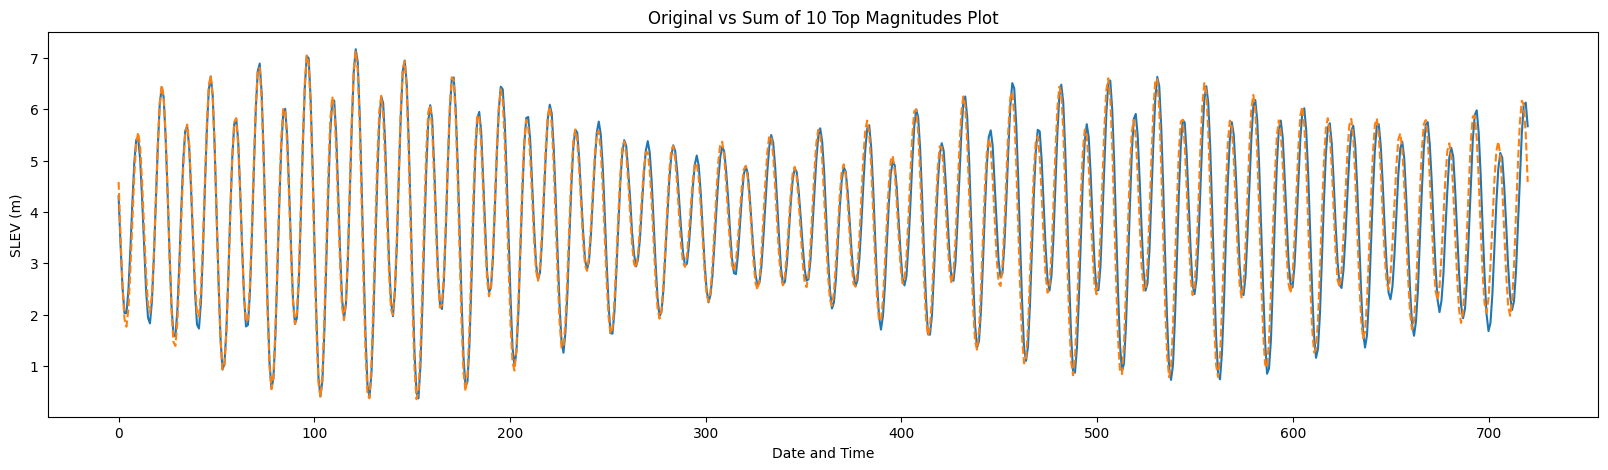

In [82]:
# define a time span
total_hours = 720
num_points = 720 # arbitrary quantity that can be adjusted for higher/lower fidelity
t = np.linspace(0, total_hours, num_points)

# # Design a wave using 10 largest coefficients and compare against all FFT results
# num_signals = 10
# wave_components = np.empty((num_signals,num_points))
summed_wave = np.zeros_like(t)

# wave components is arranged such that index 0 has the largest fourier coefficient and index 10 has the smallest of the 10 largest fourier coefficients
for idx in indices_of_largest:
    # wave_components[j] = amplitudes[j] * np.cos(2 * np.pi * frequencies[j] * t + phases[j])
    summed_wave += amplitudes[idx] * np.cos(2 * np.pi * frequencies[idx] * t + phases[idx]).astype(np.float64)
    print("Amplitude: ", amplitudes[idx], "\t","Frequency: ", frequencies[idx], "\t", "Phase: ", phases[idx], "\n")

# # Combine the 10 signals
# summed_wave = np.sum(wave_components, axis=0)
print(summed_wave.shape)

# # Visually determine if the 10 largest coefficients are characteristic of the wave
# fig = px.line(x=t, y=summed_wave, labels={'x': 'Time', 'y': 'Amplitude'}, title='Summed Waveform from Top 10 Fourier Coefficients vs Original June Data (Apr 1 - Apr 30)')
# fig.add_scatter(x=t, y=summed_wave, mode='lines', name='Summed Waveform', line=dict(color='blue')) # ignore that I double plotted the same line
# fig.add_scatter(x=t, y=june_data["SLEV(metres)"], mode='lines', name='June Data', line=dict(color='red'))

# fig.show()

## BELOW IS DIFFERENT PLOT SAME OUTPUT
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 5))

plt.plot(t, june_data['SLEV(metres)'], label='Original Tide')
plt.plot(t, summed_wave, label='Summed Wave', linestyle='--')
plt.title("Original vs Sum of 10 Top Magnitudes Plot")
plt.xlabel('Date and Time')
plt.ylabel('SLEV (m)')
plt.show()



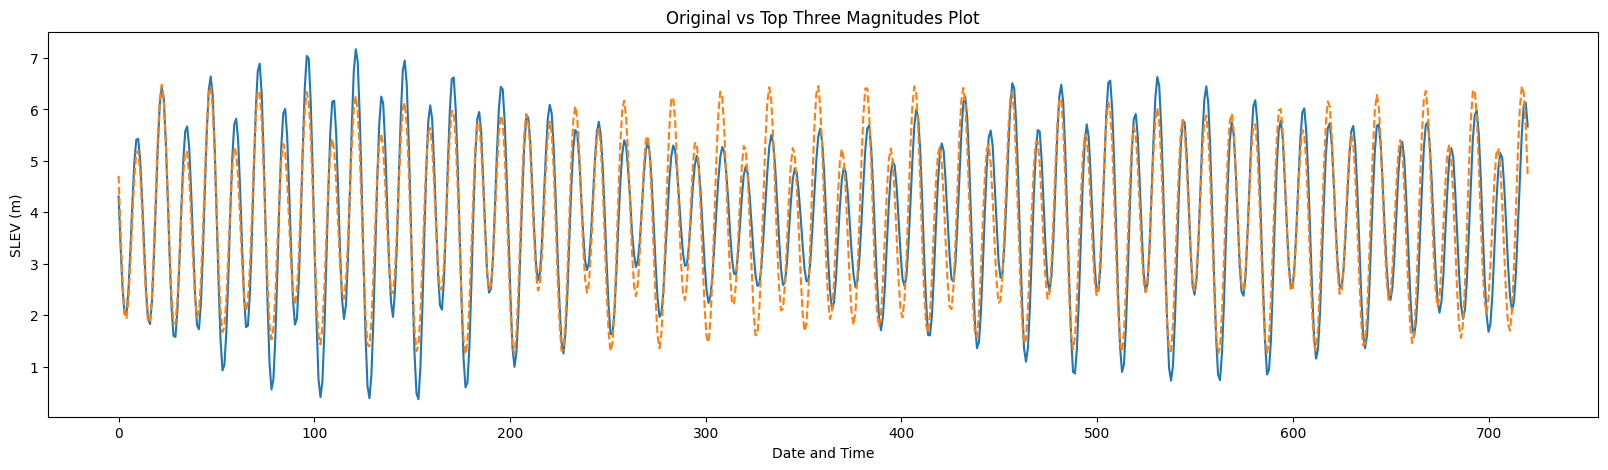

In [83]:
# Print Statement block for frequencies, amplitude and magnitude of each wave
# Note that wave_components is arranged such that index 0 has the largest fourier coefficient and index 10 has the smallest of the 10 largest fourier coefficients

# plot of just top 3 waves

top_three_wave = amplitudes[indices_of_largest[9]] * np.cos(2 * np.pi * frequencies[indices_of_largest[9]] * t + phases[indices_of_largest[9]]).astype(np.float64)
top_three_wave += amplitudes[indices_of_largest[8]] * np.cos(2 * np.pi * frequencies[indices_of_largest[8]] * t + phases[indices_of_largest[8]]).astype(np.float64)
top_three_wave += amplitudes[indices_of_largest[7]] * np.cos(2 * np.pi * frequencies[indices_of_largest[7]] * t + phases[indices_of_largest[7]]).astype(np.float64)

plt.figure(figsize=(20, 5))

plt.plot(t, june_data['SLEV(metres)'], label='Original Tide')
plt.plot(t, top_three_wave, label='Top Three Magnitudes', linestyle='--')
plt.title("Original vs Top Three Magnitudes Plot")
plt.xlabel('Date and Time')
plt.ylabel('SLEV (m)')
plt.show()

## Predict Additional 7 days

In [ ]:
# CODED INCORRECTLY

# Initialize variables
additional_days = 7
additional_hours = additional_days*24
extended_hours = total_hours + additional_hours
extended_num_points = num_points + additional_hours

# Extend the time array with intialized variables
extended_t = np.linspace(0,extended_hours,extended_num_points)

# Predict values by plotting summed_wave across the new timespan
# ADD CODE HERE

# Plot
fig = px.line(x=extended_t, y=summed_wave, labels={'x': 'Time', 'y': 'Amplitude'}, title='Summed Waveform for June 1 - May 7')
fig.show()

ValueError: All arguments should have the same length. The length of argument `y` is 720, whereas the length of  previously-processed arguments ['x'] is 888

# Non-Project code

In [ ]:
import numpy as np

# Sample time series data
time_series_data = np.array([0, 1, 0, -1, 0, 1, 0, -1])


# Perform Fast Fourier Transform (FFT)
fourier_coefficients = np.fft.fft(time_series_data)

# Print the Fourier coefficients
print("Fourier coefficients:")
print(fourier_coefficients)


Fourier coefficients:
[0.+0.j 0.+0.j 0.-4.j 0.+0.j 0.+0.j 0.+0.j 0.+4.j 0.+0.j]


Index: 0 Magnitude: 34029.49
Index: 705 Magnitude: 7068.3171738613455
Index: 8054 Magnitude: 7068.317173861344
Index: 8053 Magnitude: 3079.493992170482
Index: 706 Magnitude: 3079.493992170482
Index: 730 Magnitude: 2640.1983066715707
Index: 8029 Magnitude: 2640.19830667157
Index: 8393 Magnitude: 2222.9136079345903
Index: 366 Magnitude: 2222.9136079345903
Index: 707 Magnitude: 1908.3729065856626


In [ ]:
# Design a wave using 10 largest coefficients and compare against all FFT results

# Combine the 10 signals
# Visually determine if the 10 largest coefficients are characteristic of the wave

In [ ]:
import numpy as np

# Generate sample time series data
t = np.linspace(0, 1, 1000)  # 1000 evenly spaced points between 0 and 1
f1 = 10  # Frequency of the first component
f2 = 20  # Frequency of the second component
y = np.sin(2 * np.pi * f1 * t) + 0.5 * np.sin(2 * np.pi * f2 * t)

# Apply FFT
fft_result = np.fft.fft(y)

# Calculate amplitude
amplitude = np.abs(fft_result)

# Calculate phase
phase = np.angle(fft_result)

# Frequency bins
freq = np.fft.fftfreq(len(t), t[1] - t[0])

# Print results
for i in range(len(freq)):
    print("Frequency:", freq[i], "Amplitude:", amplitude[i], "Phase:", phase[i])


In [ ]:
import numpy as np

# Assuming you already have the FFT result stored in fft_result
# fft_result = np.fft.fft(y)

# Calculate magnitude of FFT result
magnitude = np.abs(fft_result)

# Find indices of 10 largest magnitude coefficients
indices_of_largest = np.argsort(magnitude)[::-1][:10]

# Print the indices and corresponding magnitudes
for idx in indices_of_largest:
    print("Index:", idx, "Magnitude:", magnitude[idx])


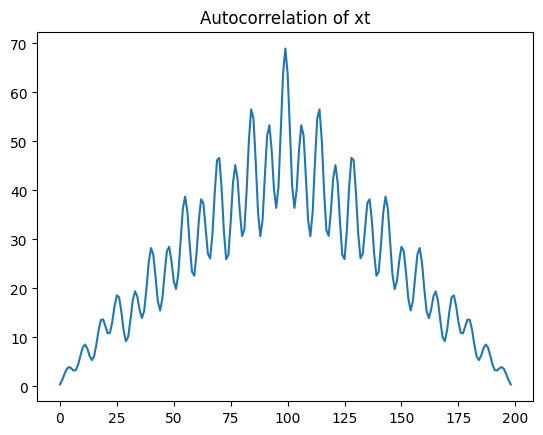

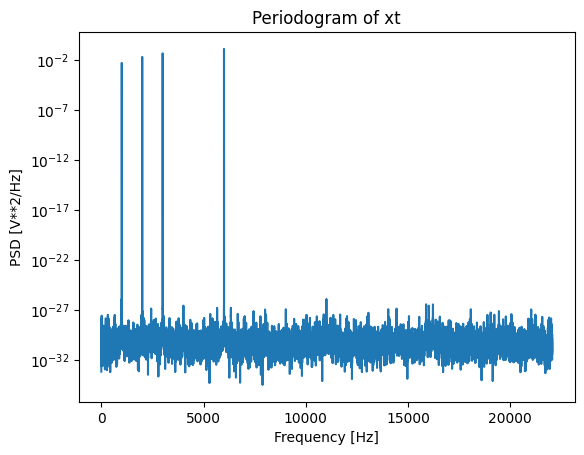

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import periodogram

# Sample rate and time vector
fs = 44100
t = np.arange(0, 1, 1/fs)

# Frequencies
f1, f2, f3, f4 = 1000, 2000, 3000, 6000

# Amplitudes
a1, a2, a3, a4 = 0.1, 0.2, 0.3, 0.5

# Phases
p1, p2, p3, p4 = 0, 0.5*np.pi, np.pi, 1.5*np.pi

# Signals
c1 = a1 * np.cos(2*np.pi*f1*t + p1)
c2 = a2 * np.cos(2*np.pi*f2*t + p2)
c3 = a3 * np.cos(2*np.pi*f3*t + p3)
c4 = a4 * np.cos(2*np.pi*f4*t + p4)

# DC offset
dc = 0.7 * np.ones(len(t))

# Combined signal
xt = c1 + c2 + c3 + c4 + dc

# Autocorrelation
acxt = np.correlate(xt[:100], xt[:100], mode='full')

# Plot the autocorrelation result
plt.figure(1)
plt.clf()
plt.plot(acxt)
plt.title('Autocorrelation of xt')
plt.show()

# Periodogram
f, Pxx = periodogram(xt, fs)

# Plot the periodogram
plt.figure(2)
plt.clf()
plt.semilogy(f, Pxx)
plt.title('Periodogram of xt')
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

# # Periodogram with more options
# f, Pxx = periodogram(xt[:1000], fs=fs, window=np.ones(1000), nfft=256)

# # Plot the periodogram with more options
# plt.figure(3)
# plt.clf()
# plt.semilogy(f, Pxx)
# plt.title('Periodogram of xt (with options)')
# plt.xlabel('Frequency [Hz]')
# plt.ylabel('PSD [V**2/Hz]')
# plt.show()
